# Job Change Prediction 

### Context

An Ed-Tech company wants to hire data scientists among people who have successfully passed some courses and then signed up for training. The company wants to know which of the people are looking for a job change and will prefer working with them after completion of training because it helps to reduce the cost and time for categorization of candidates. 

Information related to demographics, education, the experience is in hands from candidates sign up and enrollment.

### Data Description

* enrollee_id: Unique ID for the candidate

* city: City code

* city_ development _index: Development index of the city (scaled)

* gender: Gender of the candidate

* relevent_experience: Relevant experience of the candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline: Education major discipline of the candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type: Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for a job change, 1 – Looking for a job change


#### What is City Development Index?

* The City Development Index was developed for the Second United Nations Conference on Human Settlements (Habitat II) in 1996 and measures the level of development in cities. The Urban Indicators Programme of the United Nations Human Settlements Programme (UN-Habitat) developed the indicator so that they could rank cities of the world according to their level of development and as a display of indicators depicting development. The CDI cuts across the different clusters identified in the Urban Indicator Framework as it is based on five sub-indices namely, infrastructure, waste, health, education, and city product. It is useful as it provides a snap-shot view of how cities are doing concerning the different indices

### Importing Libraries

In [1]:
# %load_ext lab_black

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

### Loading Data

In [3]:
job = pd.read_csv("jobs_data.csv")

In [4]:
# Checking the number of rows and columns in the data
job.shape

(19158, 14)

* The dataset has 19158 rows and 14 columns 

### Data Overview

In [5]:
# let's create a copy of the data
df = job.copy()

In [6]:
# let's view the first 5 rows of the data
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
# let's view the last 5 rows of the data
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [8]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

* Only 4 variables are numerical rest all are object types.
* 8 columns have less than 19158 non-null values i.e. columns have missing values.

In [9]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [10]:
# let's check for missing values in the data
# round(df.isnull().sum() / df.isnull().count() * 100, 2)
df.isna().mean().round(4) * 100

enrollee_id                0.00
city                       0.00
city_development_index     0.00
gender                    23.53
relevent_experience        0.00
enrolled_university        2.01
education_level            2.40
major_discipline          14.68
experience                 0.34
company_size              30.99
company_type              32.05
last_new_job               2.21
training_hours             0.00
target                     0.00
dtype: float64

* `company_type` column has 32.05% missing values out of the total observations.
* `company_size` column has 30.99% missing values out of the total observations.
* `gender` column has 23.53% missing values out of the total observations.
* `major_discipline` column has 14.68% missing values out of the total observations.
* `education_level` column has 2.40% missing values out of the total observations.
* `last_new_job` column has 2.21% missing values out of the total observations.
* `enrolled_university` column has 2.01% missing values out of the total observations.
* `experience` column has 0.34% missing values out of the total observations.
* We will impute these values after we split the data into train, validation and test sets.

In [11]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


**Observations**
* `enrollee_id:` enrollee_id being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* `city_developement_index:` Since the value of the city development index is normalized a 0.82 average value indicates that most of the data we have is from fairly developed cities (metropolitan cities). However, the range of the index is large and varies from 0.448 to 0.949.
* `training_hours:` Training hours have a wide range from 60hrs to 336hrs. On average, an enrollee has 65hrs of training. 755 of the enrollees less than (or equal to) 88hrs of training.
* `target:` 75% of the enrollees in data are not looking for a job and maybe they just signed up to get trained in new technologies

In [12]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [13]:
df.select_dtypes("object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

**Observations**
* Most of the records are from city_103.
* Most of the enrollees are Males.
* Most enrollees have some relevant experience.
* Most of the enrollees were not enrolled in a university.
* Most of the enrollees are graduates.
* Most of the enrollees have STEM as their major discipline.
* Most enrollees have worked in a pvt_ltd company.

In [14]:
# list of all categorical variables
cat_col = df.select_dtypes("object").columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
--------------------------------------------------
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
--------------------------------------------------
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
--------------------------------------------------
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
--------------------------------------------------
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
--------------------------------------------------
STEM               14492
Humanities           669
Other          

## Data Pre-Processing

In [15]:
# enrollee_id is unique for each candidate and might not add value to modeling
df = df.drop(["enrollee_id"], axis=1)

- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

## EDA

### Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on city_development_index

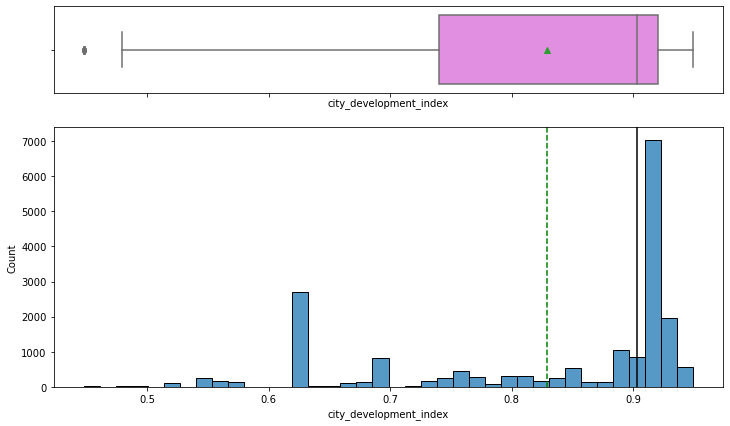

In [17]:
histogram_boxplot(df, "city_development_index")

* Distribution of city_development_index is left-skewed.
* Cities with city_development_index less than ~0.45 are outliers - such cities might be underdeveloped or tier 3 cities.
* Let's explore it further.

In [18]:
df[df["city_development_index"] < 0.45]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,city_33,0.448,NaN,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,43,1.0
5010,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,never,73,1.0
5265,city_33,0.448,NaN,No relevent experience,NaN,High School,NaN,5,NaN,Pvt Ltd,never,86,1.0
5567,city_33,0.448,NaN,Has relevent experience,Part time course,Masters,STEM,6,NaN,NaN,1,18,1.0
6127,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,Public Sector,4,32,1.0
7724,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,NaN,NaN,>4,74,0.0
9134,city_33,0.448,NaN,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


* All such records with a city development index less than 0.45 are from city_33, hence they seem to represent true pattern and we don't need to treat them as outliers.

### Observations on training_hours

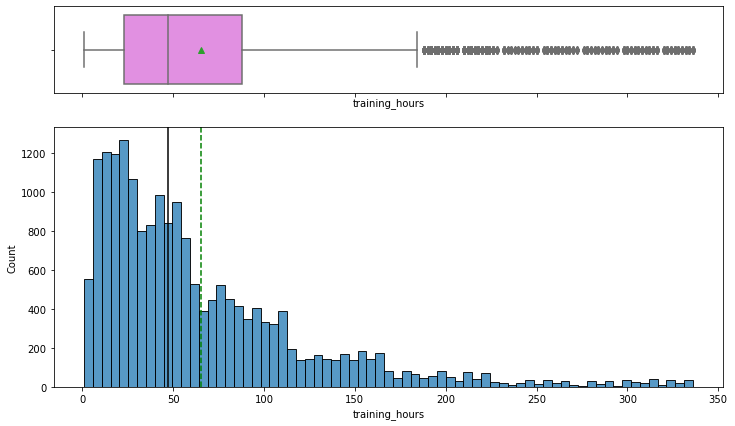

In [19]:
histogram_boxplot(df, "training_hours")

* Distribution of training_hours is right-skewed with many outliers.
* From the boxplot, we can see that enrollees with more than ~175hrs of training are outliers.

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on gender

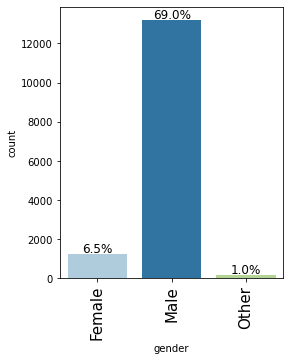

In [21]:
labeled_barplot(df, "gender", perc=True)

* 69% of the enrollees are males.

### Observations on relevant_experience

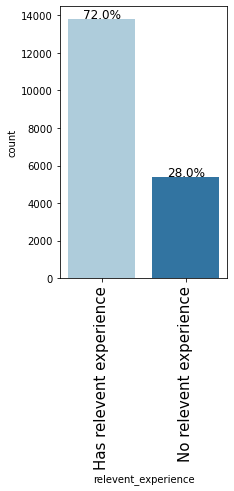

In [22]:
labeled_barplot(df, "relevent_experience", perc=True)

* 72% of the enrollees have some relevant experience.

### Observations on enrolled_university

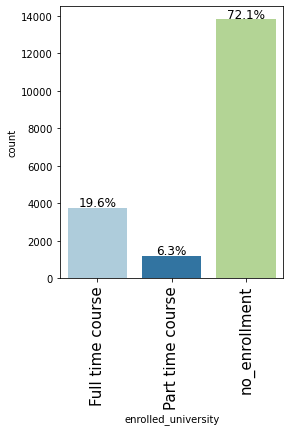

In [23]:
labeled_barplot(df, "enrolled_university", perc=True)

* 72.1% of the enrollees had no enrollment in universities followed by 19.6% of the enrollees with the full-time course.

### Observations on education_level

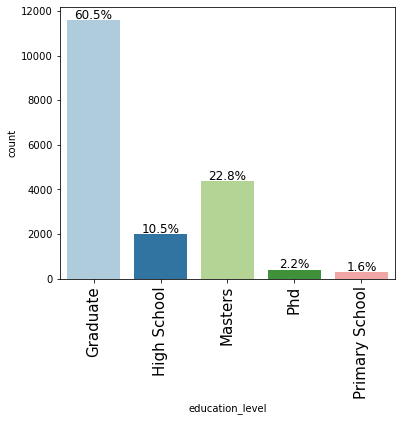

In [24]:
labeled_barplot(df, "education_level", perc=True)

* 60.5% of the enrollees are graduates, followed by 22.8% of the enrollees having Masters degree.

### Observations on major_discipline

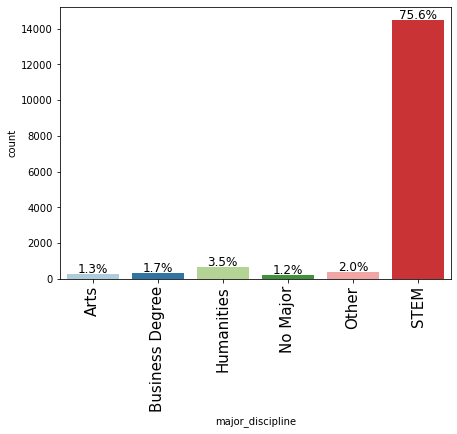

In [25]:
labeled_barplot(df, "major_discipline", perc=True)

* 75.5% of the enrollees have STEM as their major discipline. STEM includes programs in science, technology, engineering, and mathematics.

### Observations on company_size

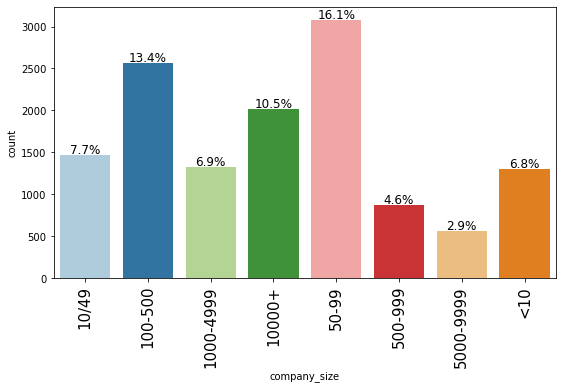

In [26]:
labeled_barplot(df, "company_size", perc=True)

* 16.1% of the enrollees have worked in a company with 50-99 employees, followed by 13.4% of the enrollees who have worked in a company with 100-500.

### Observations on company_type

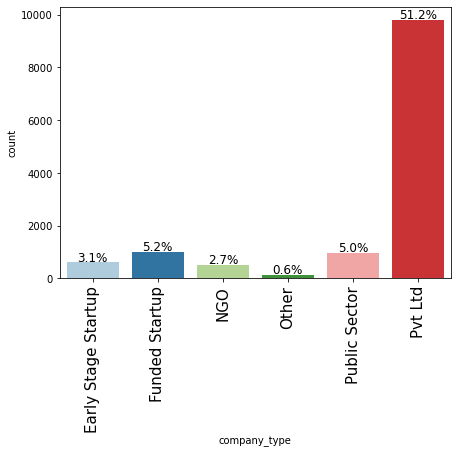

In [27]:
labeled_barplot(df, "company_type", perc=True)

* 51.2% of the enrollees have worked in private companies, followed by 8.3% enrollees in startups.

### Observations on last_new_job

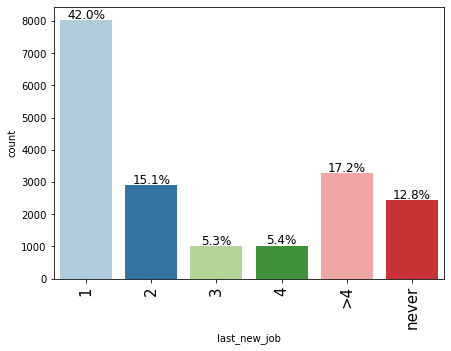

In [28]:
labeled_barplot(df, "last_new_job", perc=True)

* 42% of the enrollees have a difference of 1 year between their current and previous job followed by 17.2% of the enrollees with more than 4 years of difference.
* Never here can mean that enrollee has never worked before(freshers) or is not working right now.

## Bivariate Analysis

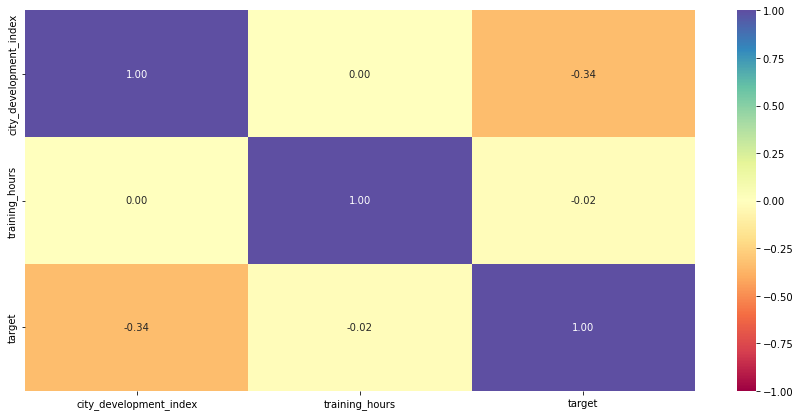

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no strong correlation either with the target or between any independent variable.
* City development index has a negative relation with the target.

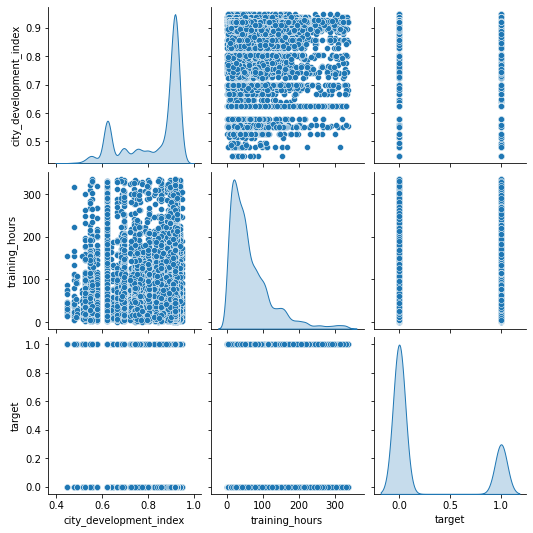

In [30]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [31]:
# df["target"].replace(1, "yes", inplace=True)
# df["target"].replace(0, "no", inplace=True)
### don't do that, do this instead, but regardless, it's already done in this CSV
# df['target'] = df["target"].map({"yes": 1, "no": 0})

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### target vs city

target      0.0   1.0    All
city                        
All       14381  4777  19158
city_21    1105  1597   2702
city_103   3427   928   4355
city_160    646   199    845
city_16    1354   179   1533
...         ...   ...    ...
city_129      3     0      3
city_8        4     0      4
city_39      11     0     11
city_111      3     0      3
city_2        7     0      7

[124 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


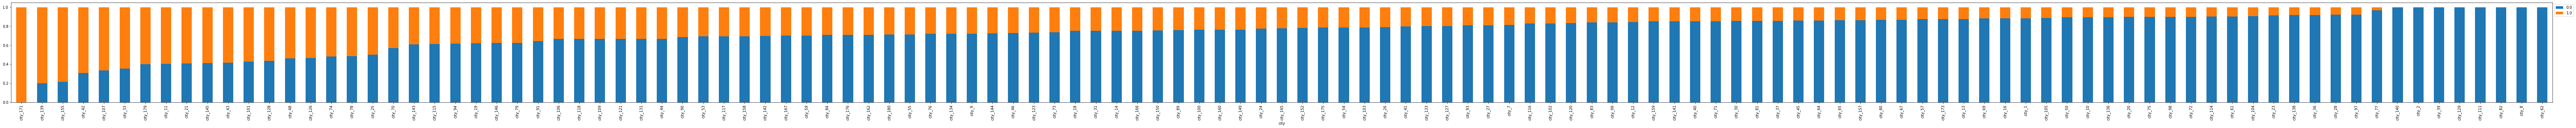

In [33]:
stacked_barplot(df, "city", "target")

* Cities 171,139, 155, and 42 show the highest percentage of enrollees looking for a job. 
* Cities with the highest percentage of enrollees looking for a job might be from tier 2 or tier 3 cities looking for better opportunities.
* This column captures a clear difference between enrollees looking for a job and those who are not, it can act as an important predictor.

### target vs gender

target    0.0   1.0    All
gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


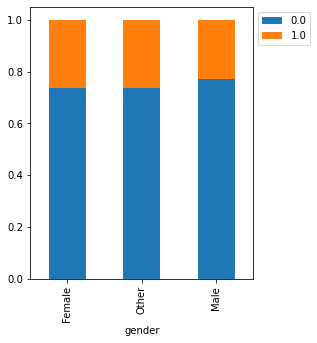

In [34]:
stacked_barplot(df, "gender", "target")

* Females followed by other gender enrollees are the ones actively looking for a job change.
* Let's add the unknown as a category (in place of missing values) and see if there's a change in observations.

In [35]:
# df["gender"] = df["gender"].replace(np.nan, "unknown")
df["gender"] = df["gender"].fillna("unknown")

target     0.0   1.0    All
gender                     
All      14381  4777  19158
Male     10209  3012  13221
unknown   3119  1389   4508
Female     912   326   1238
Other      141    50    191
------------------------------------------------------------------------------------------------------------------------


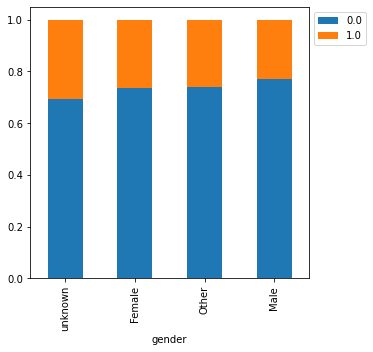

In [36]:
stacked_barplot(df, "gender", "target")

* 'Unknown' gender has the most percentage of enrollees looking for a job change.

### target vs relevant_experience

target                     0.0   1.0    All
relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


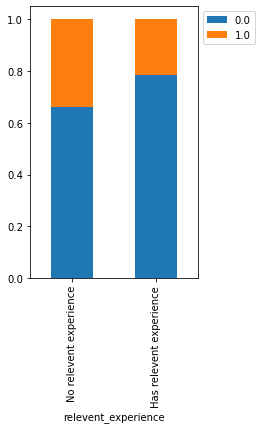

In [37]:
stacked_barplot(df, "relevent_experience", "target")

* 35% of the enrollees who do not have relevant experience are the ones looking for a job change.
* Such enrollees might be freshers looking for opportunities.
* 20% of the enrollees who have relevant experience are also looking for a job change such enrollees after upskilling might be looking for new roles with the newly acquired skills.

### target vs enrolled_university

target                 0.0   1.0    All
enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


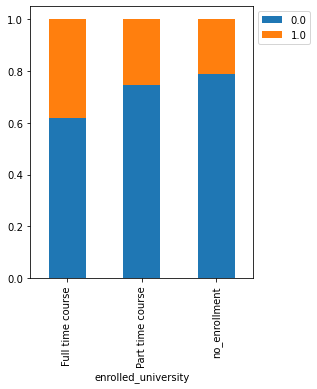

In [38]:
stacked_barplot(df, "enrolled_university", "target")

* There's a high portion of enrollees looking for a job change across all three categories.
* ~40% of the enrollees with full-time courses are looking for a job change.
* ~30% of the enrollees with part-time courses are looking for a job change.

### target vs enrolled_university

target             0.0   1.0    All
education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


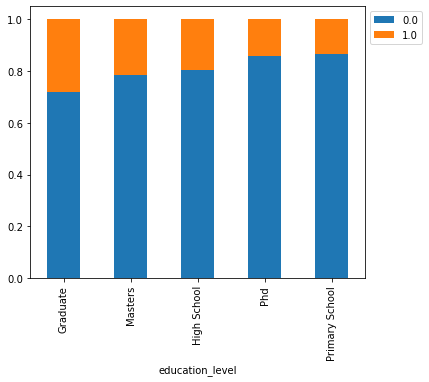

In [39]:
stacked_barplot(df, "education_level", "target")

* There's a high proportion of enrollees looking for a job change across Graduates, Masters, and High Schooler categories.
* ~30% of the graduate enrollees are looking for a job change.
* 20% of the enrollees with a master's degree are looking for a job change.

### target vs major_discipline

target              0.0   1.0    All
major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


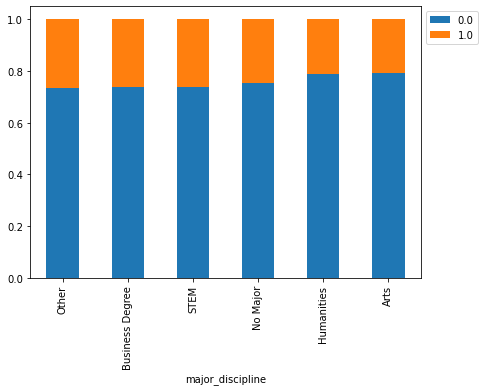

In [40]:
stacked_barplot(df, "major_discipline", "target")

* There's a high proportion of enrollees looking for a job change across all categories.

### target vs experience

target        0.0   1.0    All
experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


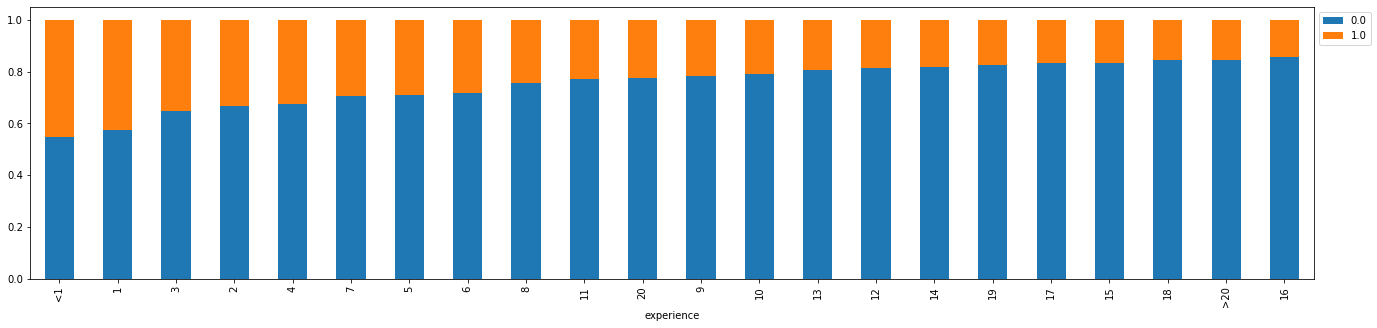

In [41]:
stacked_barplot(df, "experience", "target")

* There's a high proportion of enrollees looking for a job change having less than 10 years of experience.
* <1 year will the freshers who after training would want to do a job in a relevant field.

### target vs company_size

target          0.0   1.0    All
company_size                    
All           10853  2367  13220
50-99          2538   545   3083
100-500        2156   415   2571
10000+         1634   385   2019
10/49          1127   344   1471
<10            1084   224   1308
1000-4999      1128   200   1328
500-999         725   152    877
5000-9999       461   102    563
------------------------------------------------------------------------------------------------------------------------


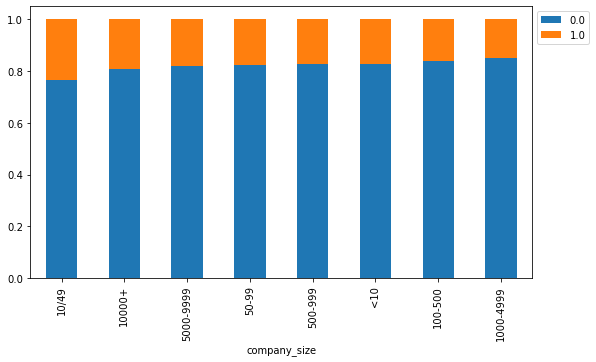

In [42]:
stacked_barplot(df, "company_size", "target")

* ~20% of the enrollees who have been in companies of different sizes are looking for a job change.

### target vs company_type

target                 0.0   1.0    All
company_type                           
All                  10625  2393  13018
Pvt Ltd               8042  1775   9817
Public Sector          745   210    955
Early Stage Startup    461   142    603
Funded Startup         861   140   1001
NGO                    424    97    521
Other                   92    29    121
------------------------------------------------------------------------------------------------------------------------


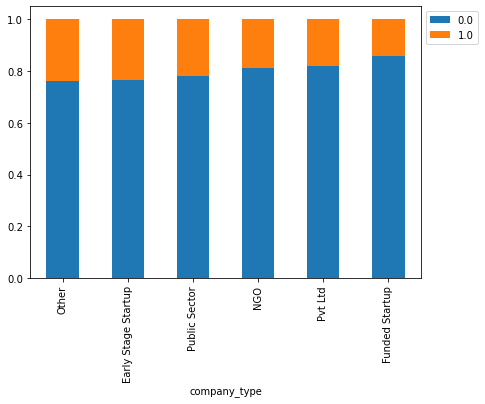

In [43]:
stacked_barplot(df, "company_type", "target")

* Enrollees from funded startups are the ones with less interest a possible reason being their startup just got funded, and they are looking for growth there and just want to upskill by undergoing the training.
* Across all types of companies/sectors ~20% of the enrollees are looking for a job change.

### target vs last_new_job

target          0.0   1.0    All
last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


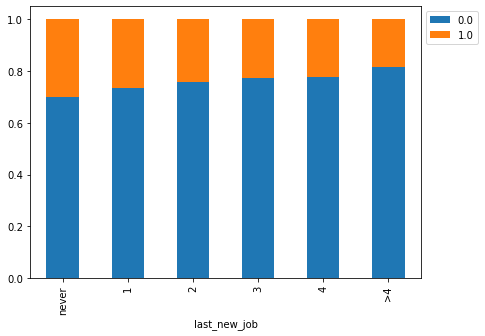

In [44]:
stacked_barplot(df, "last_new_job", "target")

* Our earlier thought of 'never' representing freshers or those who are not working right now seems true as they are the ones most interested in a job change(looking for a start).

In [45]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### target vs training_hours

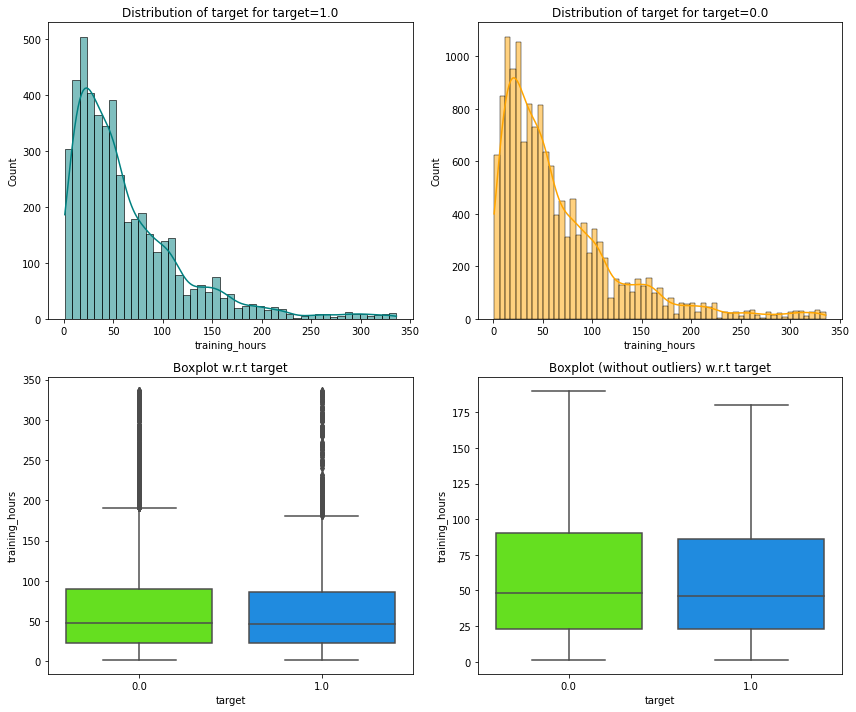

In [46]:
distribution_plot_wrt_target(df, "training_hours", "target")

* Training hours don't seem to have any impact on the target variable.

### target vs city_development_index

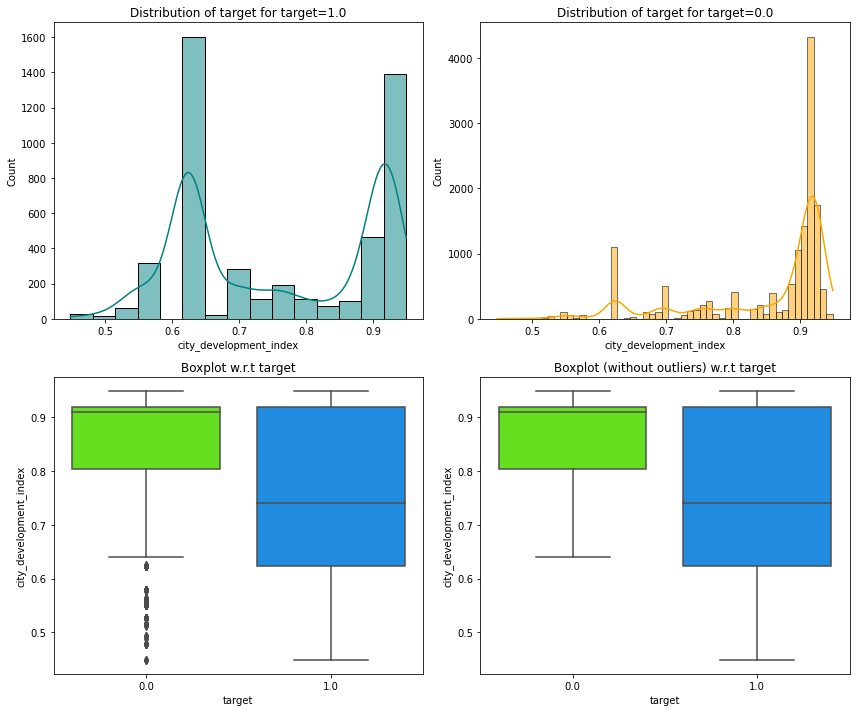

In [47]:
distribution_plot_wrt_target(df, "city_development_index", "target")

* There's a stark difference between the enrollees looking for a job and an enrollee not looking for a job.
* Enrollee from a city with a higher development index would be less likely to look for a change in a job as compared to the enrollee coming from a city with a lower development index.
* Enrollees coming from cities with a low development index might be looking for better opportunities in metropolitan cities by upskilling themselves after undergoing the training.

## Feature Engineering

In [48]:
df["city"].nunique()

123

* There are 123 unique cities in data, we can reduce the levels by grouping them into 3 major categories:
  * Developed city - with city development index greater than 0.90
  * Developing city - with city development index between 0.74 and 0.90
  * Under-Developed city - with city development index between 0.4 and 0.74

In [49]:
df["city_development_index"].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

<AxesSubplot:ylabel='Frequency'>

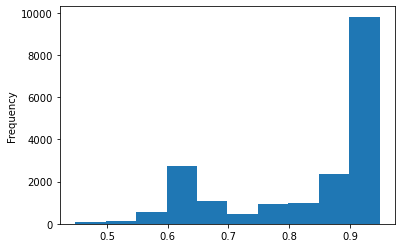

In [50]:
df["city_development_index"].plot(kind='hist')

In [51]:
df["city_development_index"].value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [52]:
# Discretize variable into equal-sized buckets based on quantiles
## NOTE: These don't match the markdown cut points stated above

df["city"] = pd.qcut(
    df["city_development_index"],
    q=[0, 0.25, 0.5, 1],
#     q=3,
    labels=["Under_Developed", "Developing", "Developed"],
)

In [53]:
df["city"].value_counts()

Developed          9561
Under_Developed    4838
Developing         4759
Name: city, dtype: int64

* 123 unique values have been binned into 3 categories.

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

In [54]:
df.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [55]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "gender",
    "enrolled_university",
    "education_level",
    "major_discipline",
    "experience",
    "company_size",
    "company_type",
    "last_new_job",
]

In [56]:
df[reqd_col_for_impute].head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,unknown,Full time course,Graduate,STEM,5,NaN,NaN,never
3,unknown,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [57]:
data1 = df.copy()

In [58]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
gender = {"Male": 0, "Female": 1, "Other": 2}  # should we include "unknown"
data1["gender"] = data1["gender"].map(gender)

enrolled_university = {"no_enrollment": 0, "Full time course": 1, "Part time course": 2}
data1["enrolled_university"] = data1["enrolled_university"].map(enrolled_university)

education_level = {
    "Graduate": 0,
    "Masters": 1,
    "High School": 2,
    "Phd": 3,
    "Primary School": 4,
}
data1["education_level"] = data1["education_level"].map(education_level)


# These aren't ordered, so they should be One-Hot Encoded, but that messes w/ the imputation strategy later
major_discipline = {
    "STEM": 0,
    "Business Degree": 1,
    "Arts": 2,
    "Humanities": 3,
    "No Major": 4,
    "Other": 5,
}
data1["major_discipline"] = data1["major_discipline"].map(major_discipline)

experience = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}
data1["experience"] = data1["experience"].map(experience)

company_type = {
    "Pvt Ltd": 0,
    "Funded Startup": 1,
    "Early Stage Startup": 2,
    "Other": 3,
    "Public Sector": 4,
    "NGO": 5,
}
data1["company_type"] = data1["company_type"].map(company_type)

company_size = {
    "<10": 0,
    "10/49": 1,
    "100-500": 2,
    "1000-4999": 3,
    "10000+": 4,
    "50-99": 5,
    "500-999": 6,
    "5000-9999": 7,
}
data1["company_size"] = data1["company_size"].map(company_size)

last_new_job = {"never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5}
data1["last_new_job"] = data1["last_new_job"].map(last_new_job)

In [59]:
data1.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Developed,0.920,0.0,Has relevent experience,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,Developing,0.776,0.0,No relevent experience,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,Under_Developed,0.624,NaN,No relevent experience,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,Developing,0.789,NaN,No relevent experience,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,Developing,0.767,0.0,Has relevent experience,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,0.0


* Values have been encoded.

### Data Preparation for Modeling

In [60]:
data1["target"].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [61]:
X = data1.drop(["target"], axis=1)
y = data1["target"]#.apply(lambda x: 1 if x == "yes" else 0)

In [62]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(11494, 12) (3832, 12) (3832, 12)


In [63]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 11494
Number of rows in validation data = 3832
Number of rows in test data = 3832


**Imputing Missing Values**

# Rectification:
- I suggest putting the `imputer` cell here, placing it earlier makes confusion in the learners.
- Transform the **validation** data
`X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])`

In [106]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)

In [65]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [66]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size    

* All missing values have been treated.
* Let's inverse map the encoded values.

In [67]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [68]:
inverse_mapping(gender, "gender")
inverse_mapping(enrolled_university, "enrolled_university")
inverse_mapping(education_level, "education_level")
inverse_mapping(major_discipline, "major_discipline")
inverse_mapping(experience, "experience")
inverse_mapping(company_size, "company_size")
inverse_mapping(company_type, "company_type")
inverse_mapping(last_new_job, "last_new_job")

* Checking inverse mapped values/categories.

In [69]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Developed          5725
Developing         2896
Under_Developed    2873
Name: city, dtype: int64
******************************
Male      10545
Female      835
Other       114
Name: gender, dtype: int64
******************************
Has relevent experience    8274
No relevent experience     3220
Name: relevent_experience, dtype: int64
******************************
no_enrollment       8445
Full time course    2340
Part time course     709
Name: enrolled_university, dtype: int64
******************************
Graduate          7060
Masters           2761
High School       1245
Phd                245
Primary School     183
Name: education_level, dtype: int64
******************************
STEM               9805
Business Degree     706
Humanities          391
Arts                248
Other               220
No Major            124
Name: major_discipline, dtype: int64
******************************
>20    1977
4       846
5       838
3       811
6       744
2       679
7       627
9      

In [70]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Developed          1945
Under_Developed     979
Developing          908
Name: city, dtype: int64
******************************
Male      3540
Female     253
Other       39
Name: gender, dtype: int64
******************************
Has relevent experience    2784
No relevent experience     1048
Name: relevent_experience, dtype: int64
******************************
no_enrollment       2787
Full time course     800
Part time course     245
Name: enrolled_university, dtype: int64
******************************
Graduate          2336
Masters            929
High School        423
Phd                 88
Primary School      56
Name: education_level, dtype: int64
******************************
STEM               3261
Business Degree     225
Humanities          136
Arts                 93
Other                68
No Major             49
Name: major_discipline, dtype: int64
******************************
>20    684
5      306
3      272
4      268
6      242
2      214
7      205
10     204
9     

In [71]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

Developed          1891
Under_Developed     986
Developing          955
Name: city, dtype: int64
******************************
Male      3478
Female     316
Other       38
Name: gender, dtype: int64
******************************
Has relevent experience    2734
No relevent experience     1098
Name: relevent_experience, dtype: int64
******************************
no_enrollment       2809
Full time course     779
Part time course     244
Name: enrolled_university, dtype: int64
******************************
Graduate          2329
Masters            920
High School        423
Phd                 91
Primary School      69
Name: education_level, dtype: int64
******************************
STEM               3206
Business Degree     229
Humanities          158
Arts                 96
Other                93
No Major             50
Name: major_discipline, dtype: int64
******************************
>20    625
4      292
5      290
3      278
6      239
2      236
9      214
10     200
7     

* Inverse mapping returned original labels.

### Creating Dummy Variables

In [72]:
# Use OneHotEncoder instead

X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(11494, 56) (3832, 56) (3832, 56)


* After encoding there are 56 columns.

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting an enrollee is looking for a job change but in reality, the enrollee is not looking for a change - Loss of resources
2. Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change  - Loss of opportunity

#### Which case is more important? 
* Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change i.e. losing on a potential candidate as the candidate will not be targeted by the HR team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [73]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [74]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Spectral")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression 

In [75]:
y_train

15429    0.0
15485    1.0
15065    0.0
15962    0.0
12470    1.0
        ... 
17633    1.0
182      0.0
19092    1.0
11177    0.0
6869     0.0
Name: target, Length: 11494, dtype: float64

In [76]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

- `Stratified K-fold` is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

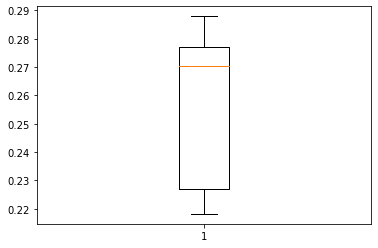

In [77]:
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=1
)  # Setting number of splits equal to 5

cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.25 to 0.29 recall.
* Let's check the performance on validation data.

In [78]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76466,0.260991,0.5603,0.356106


In [79]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.758612,0.264644,0.532632,0.353599


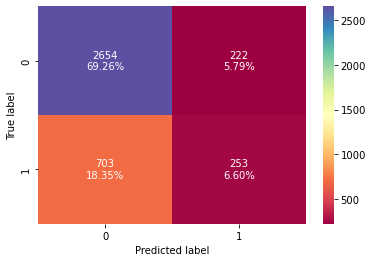

In [80]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [81]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2866
Before Oversampling, counts of label 'No': 8628 

After Oversampling, counts of label 'Yes': 8628
After Oversampling, counts of label 'No': 8628 

After Oversampling, the shape of train_X: (17256, 56)
After Oversampling, the shape of train_y: (17256,) 



### Logistic Regression on oversampled data

In [82]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

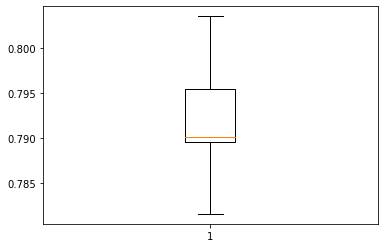

In [83]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.78 to 0.79, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [84]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81815,0.797636,0.831762,0.814341


In [85]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.735908,0.439331,0.46875,0.453564


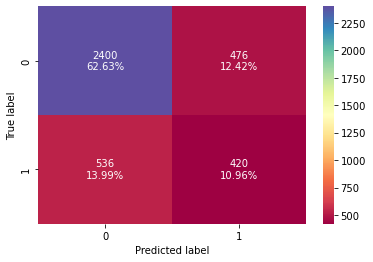

In [86]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

* Performance on the training set improved but the model is not able to replicate the same for the validation set.
* Model is overfitting.
* Lets try:

  a) Regularization to see if overfitting can be reduced

  b) Undersampling the train to handle the imbalance between classes and check the model performance.

### Regularization

In [87]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.4, random_state=1, solver='saga')

In [88]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.765936,0.713723,0.796946,0.753042


In [89]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.746608,0.535565,0.492782,0.513283


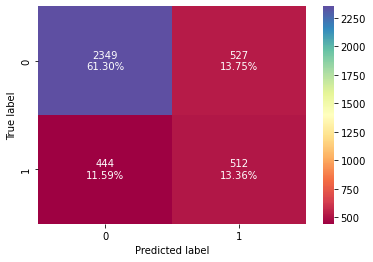

In [90]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

* After regularization, overfitting has reduced to some extent and the model is also performing well.
* Let's try undersampling now.

### Undersampling train data using Random Under Sampler

In [91]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [92]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 2866
Before Undersampling, counts of label 'No': 8628 

After Undersampling, counts of label 'Yes': 2866
After Undersampling, counts of label 'No': 2866 

After Undersampling, the shape of train_X: (5732, 56)
After Undersampling, the shape of train_y: (5732,) 



### Logistic Regression on undersampled data

In [93]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

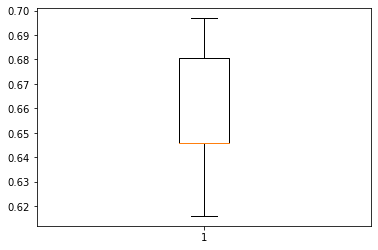

In [94]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.62 to 0.69, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [95]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.707955,0.655967,0.732087,0.69194


In [96]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.733038,0.653766,0.474563,0.549934


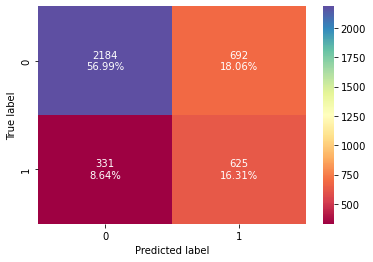

In [97]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Model performance has improved using undersampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.764660,0.818150,0.765936,0.707955
Recall,0.260991,0.797636,0.713723,0.655967
Precision,0.560300,0.831762,0.796946,0.732087
F1,0.356106,0.814341,0.753042,0.691940


In [99]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.758612,0.735908,0.746608,0.733038
Recall,0.264644,0.439331,0.535565,0.653766
Precision,0.532632,0.468750,0.492782,0.474563
F1,0.353599,0.453564,0.513283,0.549934


* Logistic regression model on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [100]:
# Calculating different metrics on validation set
log_reg_under_test_perf = model_performance_classification_sklearn(
    log_reg_under, X_test, y_test
)
print("Test performance:")
log_reg_under_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.724426,0.641885,0.461944,0.537248


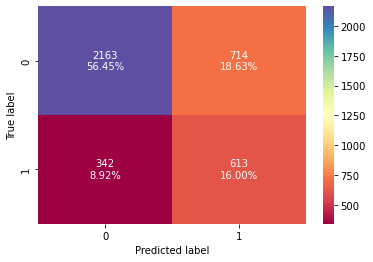

In [101]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set

### Finding the coefficients

In [102]:
# let us check the coefficients and intercept of the model (lin. and log. reg. sklearn)

coef_df = pd.DataFrame(
    np.append(log_reg_under.coef_, log_reg_under.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,Intercept
Coefficients,-0.655604,-0.000368,-1.51942,-1.484038,-0.084301,0.310584,0.416727,-0.44695,-0.541839,-0.85441,...,-0.515139,0.040165,-0.199398,-0.186702,-0.034499,0.141179,0.310766,0.026415,-0.262147,1.760958


### Coefficient interpretations

* Coefficient of gender_Other, relevent_experience_No relevant experience, company_type_Other, last_new_job_2, etc are positive, increase in these will lead to an increase in chances of a person looking for a job change
* Coefficient of city_development_index, training_hours, city_Developing, city_Developing, etc are negative increase in these will lead to a decrease in chances of a person not looking for a job change

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [103]:
odds = np.exp(log_reg_under.coef_[0])  # converting coefficients to odds

pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display

pd.DataFrame(
    odds, X_train.columns, columns=["odds"]
)#.T  # adding the odds to a dataframe

,odds
city_development_index,0.519128
training_hours,0.999633
city_Developing,0.218839
city_Developed,0.226720
gender_Male,0.919154
gender_Other,1.364221
relevent_experience_No relevent experience,1.516988
enrolled_university_Part time course,0.639576
enrolled_university_no_enrollment,0.581677
education_level_High School,0.425534


* Percentage change in odds

In [104]:
perc_change_odds = (
    np.exp(log_reg_under.coef_[0]) - 1
) * 100  # finding the percentage change

pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display

pd.DataFrame(
    perc_change_odds, X_train.columns, columns=["change_odds%"]
).T  # adding the change_odds% to a dataframe

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
change_odds%,-48.087158,-0.036744,-78.116115,-77.327976,-8.084577,36.422136,51.698804,-36.042393,-41.832264,-57.446561,-26.727412,-31.435934,-66.20415,36.377924,20.795916,36.096959,-3.302475,13.726151,-15.188619,22.653129,-12.016197,9.956839,17.444891,5.077803,-20.265209,-11.817808,-32.401682,-13.753833,9.124117,-5.905096,12.268258,22.219565,-8.023815,0.732276,24.094389,-1.573233,6.273181,60.727295,-8.614163,31.62422,112.203628,39.011714,4.574265,-2.542026,16.429623,-21.423938,17.166362,-40.258246,4.098274,-18.077609,-17.030867,-3.391049,15.163094,36.447056,2.676675,-23.060188


### Conclusion

* city_developement_index: Holding all other features constant a 1 unit change in city_development_index will decrease the odds of a person looking for a job by 0.56 times or a 43% decrease in odds of looking for a job change

* training_hours: Holding all other features constant a 1 unit change in training_hours will decrease the odds of a person looking for a job by 0.99 times or a 0.05% decrease in odds of a person looking for a job change

* city - developing/developed: 
    * The odds of a person who is from a developing city looking for a job change is 0.22 times less than a person who is from an under-developed city or a 77% fewer odds than a person who is from an under-developed city

    * Similarly, The odds of a person who is from a developed city looking for a job change is 0.24 times less than a person who is from an under-developed city or a 75% fewer odds than a person who is from an under-developed city (keeping under-developed cities as a reference).

* gender - male/other -  The odds of a male looking for a job change is 6.3% lower than a female. Similarly, The odds of a person from 'other' gender looking for a job change is 25% higher than a female. (keeping females as a reference).

* relevent_experience - No relevant experience: The odds of a person who has no relevant job experience looking for a job change 1.56 times higher than the person with some relevant experience or is 56% higher than a person who has some relevant experience.

`Interpretation for other attributes can be made similarly.`

### Business Insights and Recommendations

* As we saw in our analysis and also the logistic regression model shows that several training hours have a very less impact on a person looking to change a job, so the company should not give high importance to this attribute while looking to hire a person.
* A person from an under-developed city would highly be looking for a switch and if an enrollee fulfills the criterion of job role they should be given higher preference than enrollees from other cities (developed and underdeveloped).
* To have a diverse culture in the company enrollees from other genders can be hired as they are more likely to look for a new job role.
* Enrollees with no relevant experience or no experience - generally freshers are more likely to look for a job and such enrollees on fulfilling the criterion of job should be the ones the company should focus on.
* Enrollees from early-stage startups, public sectors, or NGOs are more likely to switch to a new role as compared to the ones from the Private sector or Funded startups.
* Company size is an important aspect, those enrollees who have been in a company with a higher number of employees (1000-5000 or 10000+) are the ones who are actively looking for a switch - Such enrollees might now be looking for higher roles in team management, or it is much easier for such enrollees to fit into a workplace with so higher exposure to the working environment.

**Note-**
* The aim of this case study is to cover the concepts of week 1 in model tuning, More predictive models and hyperparameter tuning can be tried to improve the model results.